In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn import mixture
from sklearn import cluster
from sklearn import metrics
from sklearn import manifold
from sklearn import model_selection
from sklearn import ensemble
import pickle
import warnings 
warnings.filterwarnings("ignore")

*Признаки в итоговой таблице:* \
\
<b>population</b> - Численность населения,чел \
<b>cash_income</b> - Среднедушевые денежные доходы, руб \
<b>child_mort</b> - Детская смертность на душу населения , чел \
<b>borned</b> - Рождаемость на душу населения, чел \
<b>disabled</b> - Число инвалидов на душу населения , чел \
<b>grp</b> - Валовый региональный продукт на душу населения, руб \
<b>poverty_%</b>- Люди ,живущие за чертой бедности, % \
<b>Social_expenses_%</b> - Расходы на социальную политику, % \
<b>retail</b> - Оборот розничной торговли на душу населения, руб \
<b>poverty_deti_%</b> - Малоимущие дети, доля % \
<b>poverty_pens_%</b> - Малоимущие пенсионеры, доля % \
<b>poverty_trud_%</b> - Малоимущие трудоспособные, доля % \
<b>rep_mining</b> - объем производимой добычи полезных ископаемых на душу населения, руб \
<b>rep_industry</b> - объем производимой промышленности на душу населения, руб \
<b>rep_manufacture</b> - объем производимого обрабатывающего производства на душу населения, руб \
<b>rep_electro</b> - объем производимой электрической энергии, газом и паром на душу населения, руб \
<b>unemployed</b> - Численность безработных на душу населения, чел \
<b>drug</b> - заболеваемость впервые в жизни установленным диагнозом наркомании на 100 тыс. населения, чел \
<b>alco</b> - Заболеваемость впервые в жизни установленным диагнозом алкоголизма на 100 тыс. населения, чел \
<b>d_resp</b> - Заболеваемость ”болезни органов дыхания”, на 100 тыс человек населения, чел. \
<b>d_blood</b> - Заболеваемость ”Болезни системы кровообращения”, на 100 тыс человек населения, чел. \
<b>d_endo</b> - Заболеваемость ”Болезни эндокринной системы, расстройства питания и нарушения обмена веществ”, на 100 тыс человек населения, чел \
<b>d_all</b> - Заболеваемость у пациентов с диагнозом, установленным впервые в жизни, на 100 тыс человек населения, чел. \
<b>square_liv</b> - Размер жилой площади в расчете на члена домохозяйства, м2 \

In [2]:
Result_regions = pd.read_csv('social_russia_data\Result_regions.csv', index_col='Регион')
Result_regions.head(3)

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,...,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
Регион,,,,,,,,,,,,,,,,,,,,,
Белгородская область,1.528216e+06,31222.4,0.000044,1.628376,578765.06,7.68,14.74,216128.2,22.050,6.175,...,17.286679,0.000000,0.010295,2.366667,44.200000,27195.7,3995.8,813.6,74637.4,17.8
Брянская область,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375,3.875,...,14.387151,0.000000,0.010074,10.000000,94.100000,33294.4,3201.2,1641.5,77439.0,24.1
Владимирская область,1.449906e+06,24147.6,0.000052,1.044558,357923.42,13.20,22.96,162836.2,29.625,5.425,...,26.355518,0.024677,0.010033,10.466667,69.166667,46461.1,2715.0,1265.2,94163.6,0.0


Пропущенные значения отсутствуют.

In [3]:
Result_regions.isnull().sum()

population           0
cash_income          0
child_mort           0
disabled             0
grp                  0
poverty_%            0
Social_expenses_%    0
retail               0
poverty_deti_%       0
poverty_pens_%       0
poverty_trud_%       0
rep_mining           0
rep_industry         0
rep_manufacture      0
rep_electro          0
unemployed           0
borned               0
drug                 0
alco                 0
d_resp               0
d_blood              0
d_endo               0
d_all                0
square_liv           0
dtype: int64

In [4]:
# применим данную функцию чтобы отображались все столбцы для удобства просмотра статистических данных по методу describe
pd.set_option('display.max_columns', 500)
Result_regions.describe()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_mining,rep_industry,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_resp,d_blood,d_endo,d_all,square_liv
count,8.500000e+01,85.000000,85.000000,85.000000,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.748439e+06,30796.835294,0.000063,0.893499,6.432744e+05,14.788235,21.252706,184180.477647,37.317353,5.946471,51.734706,273.679375,580.365055,259.328384,40.092023,0.013885,0.012202,10.569412,72.909608,36133.681176,3119.756471,1420.935294,79982.394118,16.321176
std,1.693082e+06,13249.940010,0.000028,0.265672,8.953064e+05,5.480914,4.426399,51943.036299,6.429734,2.030149,7.399066,938.504234,1005.638303,192.062286,30.508060,0.024615,0.002790,9.125030,34.618516,9801.407789,962.750164,522.536177,17440.366421,4.292632
min,4.258371e+04,16234.600000,0.000029,0.309457,1.345015e+05,5.860000,6.480000,49174.200000,12.625000,0.675000,21.775000,0.000000,10.191205,1.635815,2.414834,0.000000,0.008322,0.666667,17.800000,14313.900000,1357.300000,598.900000,44792.000000,0.000000
25%,7.975911e+05,23454.800000,0.000048,0.754446,3.047154e+05,10.720000,19.940000,152320.600000,34.950000,4.950000,50.625000,1.827713,188.719459,134.341602,20.942535,0.000000,0.010509,5.700000,51.900000,29633.500000,2486.200000,1102.200000,67012.900000,15.500000
50%,1.241397e+06,26939.600000,0.000055,0.896733,4.270128e+05,14.000000,21.980000,180102.800000,38.875000,5.625000,54.425000,8.646625,350.725263,210.642195,32.905649,0.000000,0.011711,8.433333,67.283333,34749.200000,2894.300000,1346.600000,77439.000000,16.900000
75%,2.454000e+06,31385.800000,0.000068,1.044558,5.490237e+05,17.480000,24.220000,216919.000000,40.875000,7.075000,55.875000,125.064978,553.879794,392.993123,47.213162,0.025502,0.012782,11.600000,83.433333,41421.500000,3616.800000,1700.200000,89949.900000,18.100000
max,1.147229e+07,80159.800000,0.000177,1.628376,6.408588e+06,34.760000,28.480000,380821.800000,47.700000,10.975000,61.425000,7023.667533,7351.484737,812.994315,198.939139,0.157784,0.024560,68.400000,264.600000,70452.800000,6010.800000,3885.000000,138231.700000,27.800000


*Краткие выводы по статистике:*\
\
Максимальный среднедушевой доход 80 159 руб, минимальный 16234 руб.\
В среднем 14% населения живут за чертой бедности, из них 38% дети.\
Минимальные траты на социальную политику в регионах составляет 6%, максимальный 28%.

Визуализируем распределение признаков

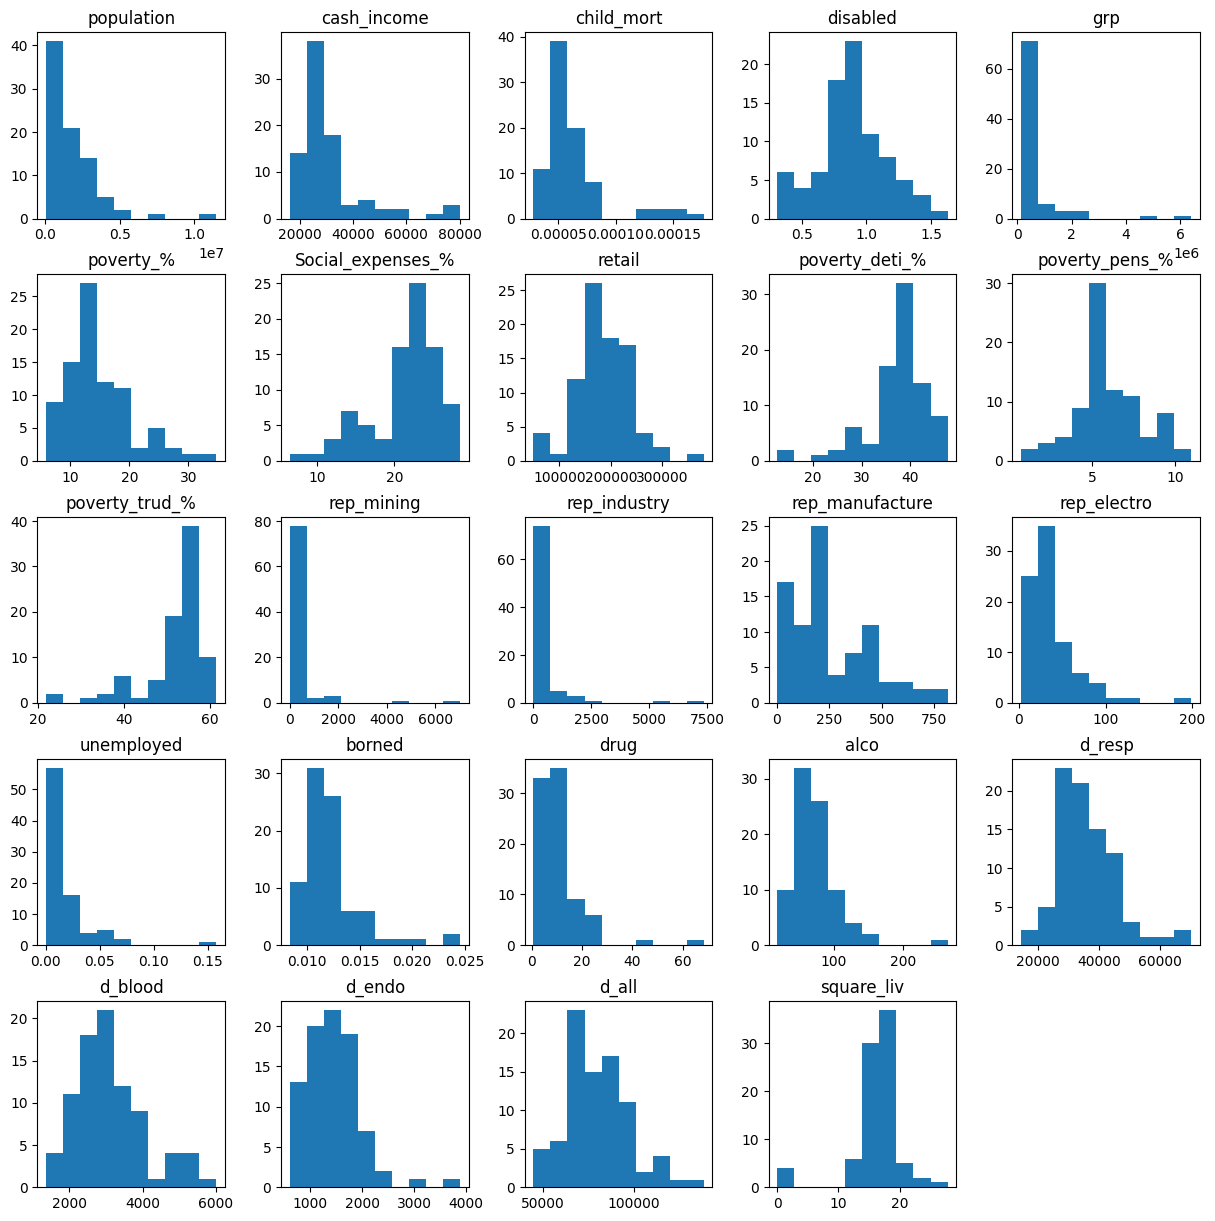

In [5]:
Result_regions.hist(figsize = (15,15), grid = False)
plt.show()

Не все гистограммы имеют симметричный вид, что подтверждает наличие нескольких групп признаков.

Тест Шапиро на нормальность распределения показывает, что только признак 'disabled' (Число инвалидов на душу населения) можно считать нормально распределенным (p-value = 0.323).

In [6]:
for col in Result_regions.columns:
    _, p = shapiro(Result_regions[col])
    print(f'{col}:   p-value = {p:.3f}')

population:   p-value = 0.000
cash_income:   p-value = 0.000
child_mort:   p-value = 0.000
disabled:   p-value = 0.323
grp:   p-value = 0.000
poverty_%:   p-value = 0.000
Social_expenses_%:   p-value = 0.000
retail:   p-value = 0.021
poverty_deti_%:   p-value = 0.000
poverty_pens_%:   p-value = 0.078
poverty_trud_%:   p-value = 0.000
rep_mining:   p-value = 0.000
rep_industry:   p-value = 0.000
rep_manufacture:   p-value = 0.000
rep_electro:   p-value = 0.000
unemployed:   p-value = 0.000
borned:   p-value = 0.000
drug:   p-value = 0.000
alco:   p-value = 0.000
d_resp:   p-value = 0.002
d_blood:   p-value = 0.001
d_endo:   p-value = 0.000
d_all:   p-value = 0.021
square_liv:   p-value = 0.000


Создадим тепловую карту, визуализирующую значения матрицы корреляции всех пар переменных

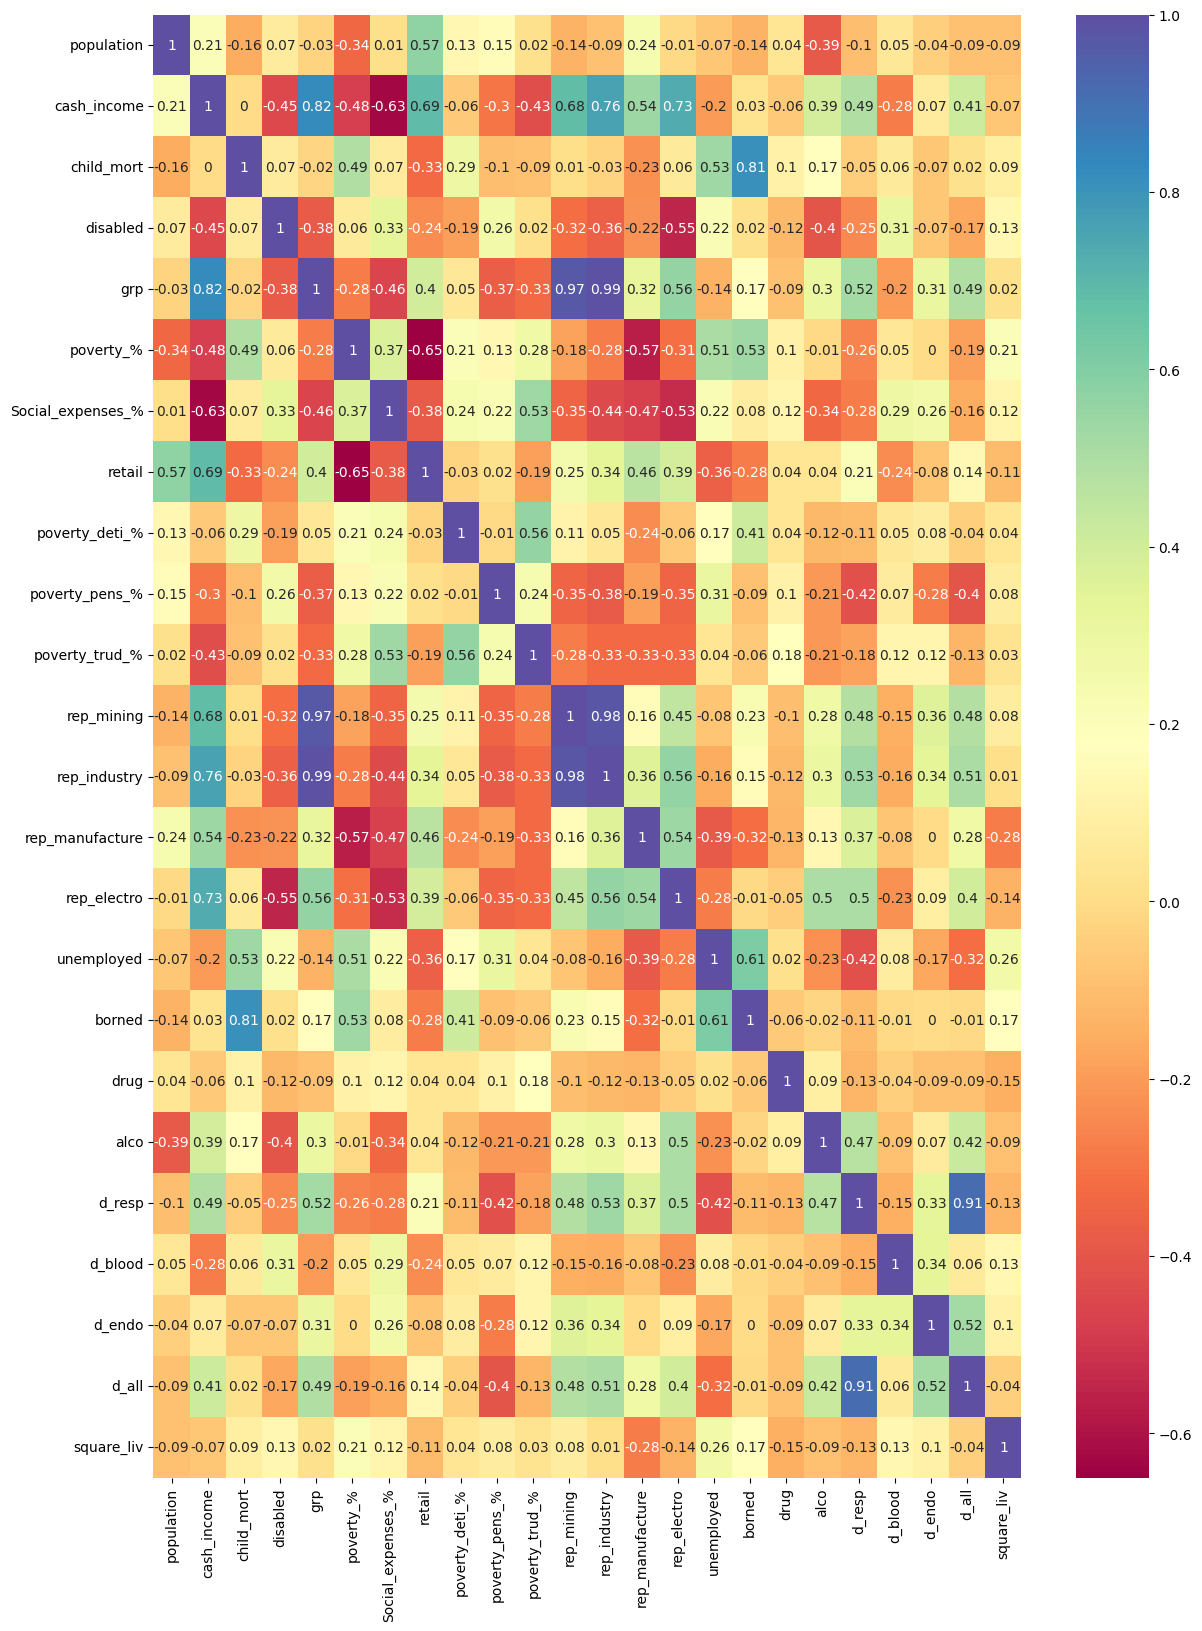

In [7]:
plt.figure(figsize=(14, 19))
sns.heatmap(Result_regions.corr().round(decimals=2), cmap= "Spectral", annot=True)
plt.show()

Показатели объемов добычи полезных ископаемых и промышленности и врп (rep_mining и rep_industry, grp) имеют сильную линейную зависимость со значением корреляции 0,98 и 0,99, один из таких признаков можно убрать для обучения, так как они практически одинаковые. Напротив признаки бедности и оборота розничной торговли (poverty_%, retail) имеют обратную корреляцию со значением -0,65. Кроме того видно, что ВРП (grp) имеет достаточную обратную корреляцию (-0,46) с расходами на соц. политику, и практически не имеет зависимости с болезнями, безработными и малоимущим населением.

Создадим матрицу диаграмм разброса для признаков описывающих бедные слои населения и врп с доходами 

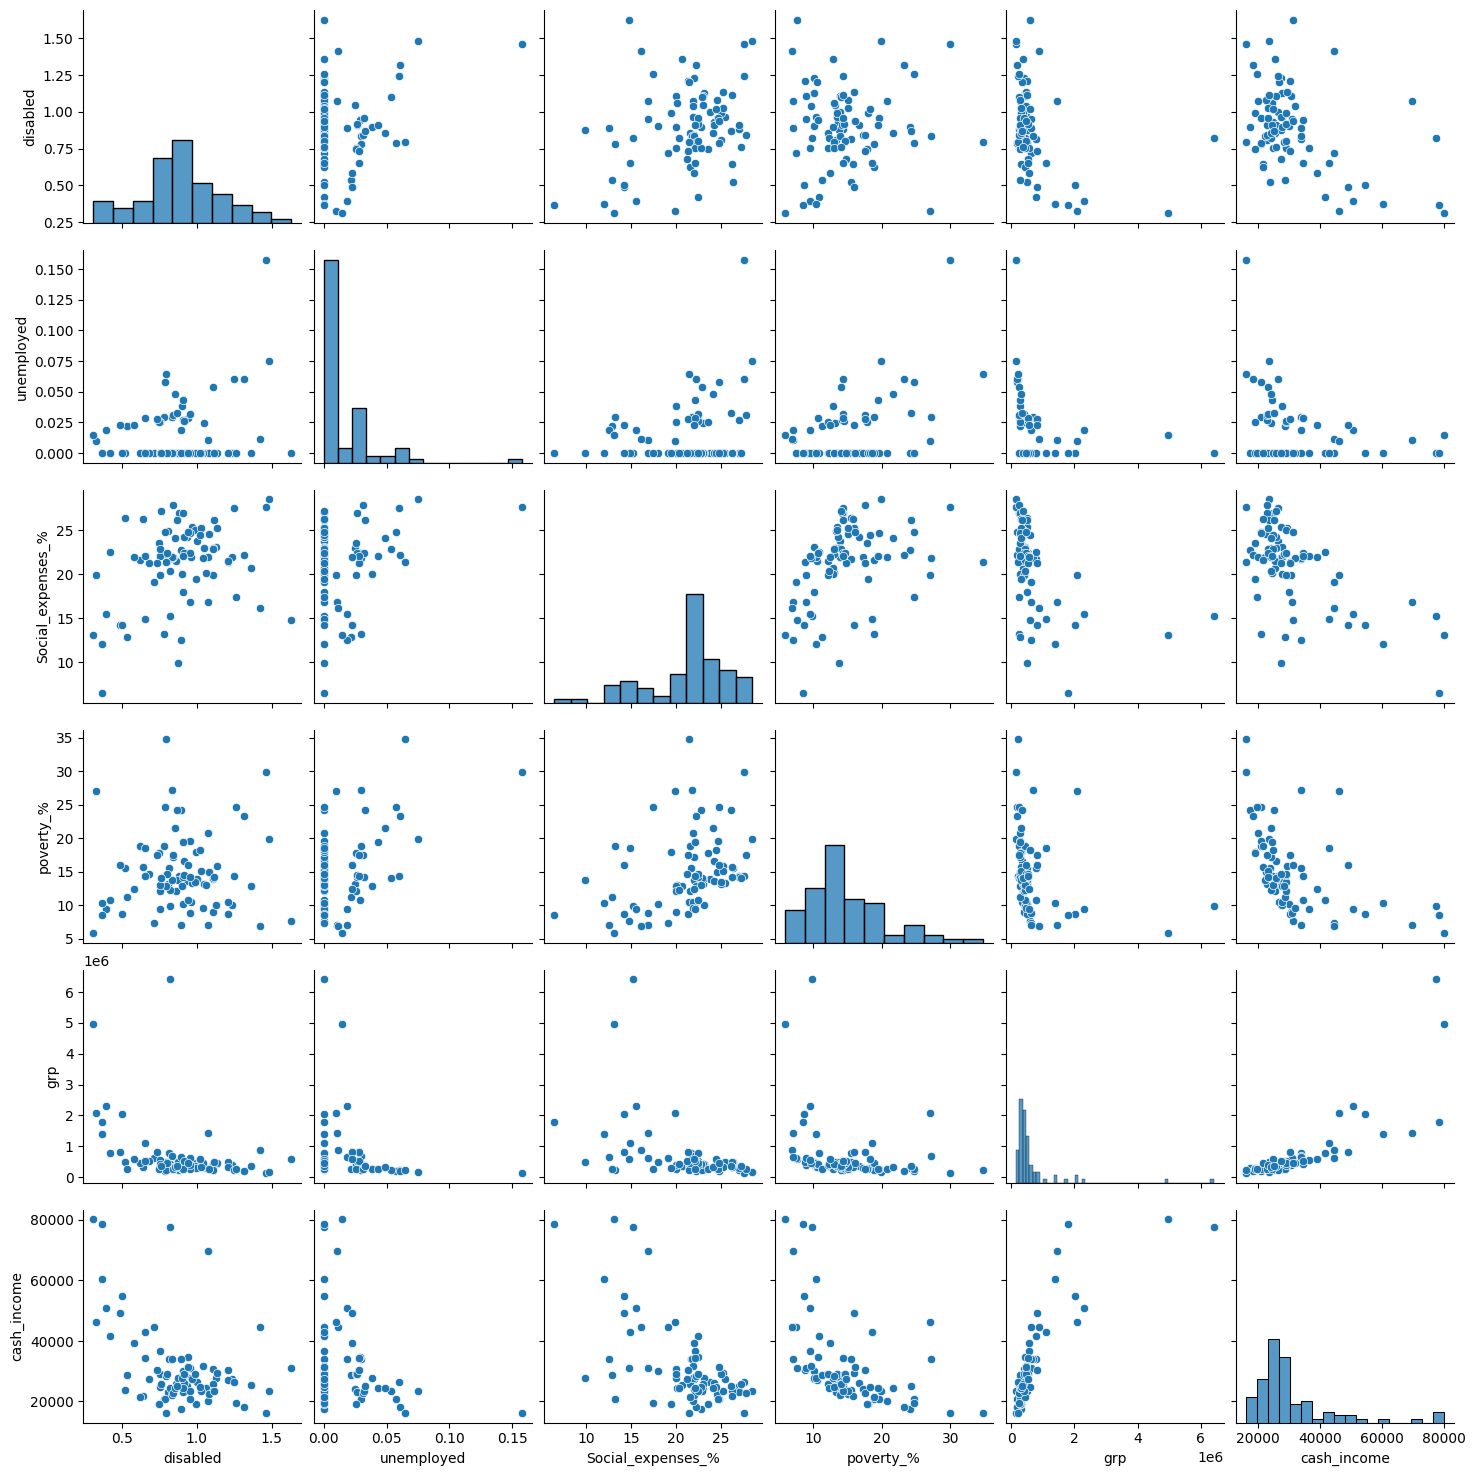

In [8]:
sns.pairplot(Result_regions, vars=['disabled','unemployed','Social_expenses_%','poverty_%','grp','cash_income'])

Как и ранее на тепловой карте корреляции, видно, что пары переменных имеют сильную линейную связь, а другие - обратную линейную связь. Так доходы населения обратно связаны с расходами на соц. политику.

Исходя из тепловой карты уберем признаки дублирующие ВРП - rep_industry и rep_mining, а также d_resp дублирует общую заболеваемость

In [9]:
result_s = Result_regions[['population', 'cash_income', 'child_mort', 'disabled', 'grp', 'poverty_%', 'Social_expenses_%', 
    'retail', 'poverty_deti_%', 'poverty_pens_%', 'poverty_trud_%', 'rep_manufacture', 'rep_electro', 'unemployed', 
    'borned', 'drug', 'alco', 'd_blood', 'd_endo', 'd_all', 'square_liv']]
print(result_s.shape)

(85, 21)


Перед кластеризацией выполним стандартизацию признаков. Так как признаки датасета имеют большие различия между своими диапазонами, и для моделей машинного обучения, основанных на вычислении дистанции между точками на графике, это спровоцирует искаженное восприятие данных. \
Для удобства обернём эти шаги по предобработке данных в pipeline.

In [10]:
pipe = Pipeline([('scaler', preprocessing.StandardScaler()), ('pca', decomposition.PCA(n_components=2))])
pipe = pipe.fit(result_s)
table_processed = pipe.transform(result_s)
rfm_table_processed = pd.DataFrame(data = table_processed, columns = ['axis-1', 'axis-2'])

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

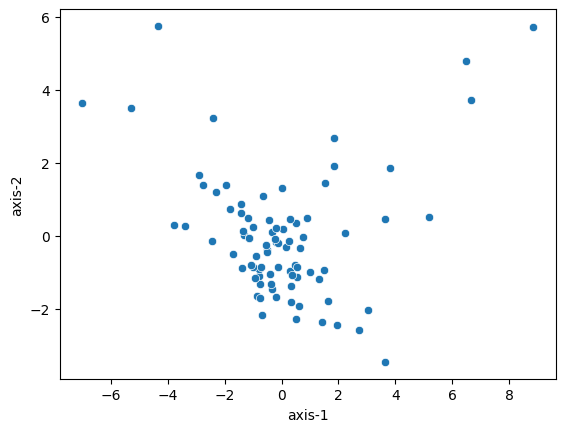

In [11]:
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2')

Попробуем разделить это пространство главных компонент на сегменты. 

Попробуем воспользоваться методом k-means. 

In [12]:
#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = cluster.KMeans(n_clusters = i , random_state = 42 ).fit(rfm_table_processed)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(rfm_table_processed,  y_pred))

2 0.5800087235860798
3 0.4826430659393543
4 0.455050986450832
5 0.43050690723803636
6 0.4022625318527016
7 0.3525517909842375
8 0.3710152881737278
9 0.37316107505346546


Теперь возьмём EM-алгоритм.

In [13]:
#проходимся циклом по всем нужным нам значениям количества кластеров
for j in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    gm = mixture.GaussianMixture(n_components = j , random_state = 42 ).fit(rfm_table_processed)
	#предсказываем метки
    y_pred_Gaussian = gm.predict(rfm_table_processed)
	#выводим результат для коэффициента силуэта
    print (j, metrics.silhouette_score(rfm_table_processed,  y_pred_Gaussian))

2 0.541983053971578
3 0.5488478584489852
4 0.42661484066225325
5 0.468585254777695
6 0.2902759270059079
7 0.30535496641927923
8 0.2766380738179335
9 0.35180823671507316


Лучшая модель K-Means, т.к. в нем коэффициент силуэта наибольший 0.58
Обучим модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [14]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
kmeans.fit(rfm_table_processed)
rfm_table_processed.loc[:, 'Label'] = kmeans.labels_
rfm_table_processed['Label'].value_counts()

Label
0    77
1     8
Name: count, dtype: int64

Визуализируем результаты кластеризации:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

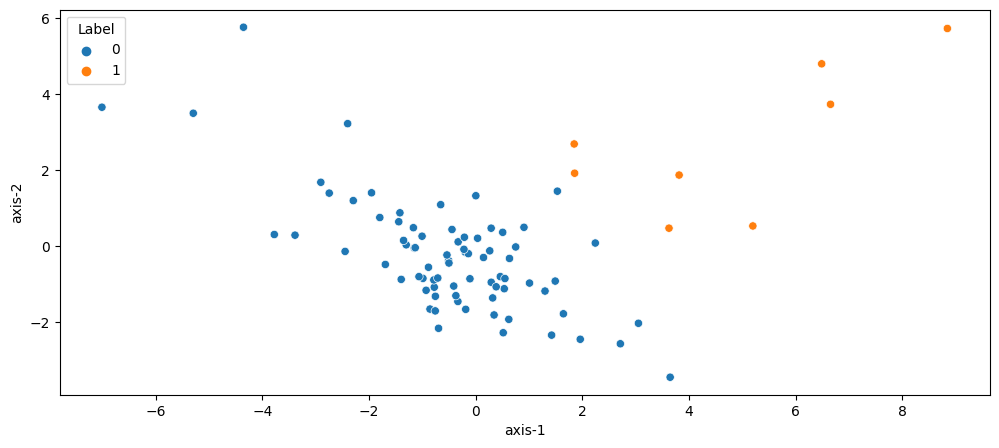

In [15]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=rfm_table_processed, 
    x='axis-1', 
    y='axis-2', 
    hue='Label',
)

Итак, у нас есть два кластера. Давайте посмотрим статистику по ним.  

In [16]:
result_s.loc[:, 'KMeans_label'] = kmeans.labels_

In [17]:
cluster_1 = list(result_s[result_s['KMeans_label']==1].index)
print (', '.join(cluster_1))
result_s.loc[result_s['KMeans_label'] == 1].describe()

Ненецкий автономный округ, Тюменская область, Ханты-Мансийский автономный округ — Югра, Ямало-Ненецкий автономный округ, Республика Саха (Якутия), Магаданская область, Сахалинская область, Чукотский автономный округ


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,KMeans_label
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.0
mean,9.063507e+05,61417.975000,0.000071,0.467663,2.754609e+06,12.297500,13.930000,240402.150000,37.615625,3.946875,42.796875,420.377384,104.344774,0.005425,0.014115,7.933333,127.714583,2373.425000,1668.100000,99430.41250,16.250000,1.0
std,1.148521e+06,15300.437492,0.000038,0.182054,1.888408e+06,7.023849,3.791766,33353.278336,9.663683,2.294576,9.070394,280.399621,47.860755,0.007840,0.001730,6.029873,66.850196,499.064785,679.867569,27614.70502,2.470396,0.0
min,4.258371e+04,42811.200000,0.000040,0.309457,1.099324e+06,5.860000,6.480000,191623.800000,24.475000,0.675000,24.850000,37.863444,37.494058,0.000000,0.010973,0.666667,53.133333,1453.400000,922.000000,64208.60000,13.800000,1.0
25%,1.352021e+05,49691.200000,0.000052,0.355184,1.683280e+06,8.645000,12.850000,223742.550000,28.206250,1.856250,39.593750,200.408577,83.656086,0.000000,0.012962,2.491667,76.812500,2187.250000,1254.075000,79749.85000,14.050000,1.0
50%,5.191492e+05,57574.900000,0.000057,0.381149,2.047395e+06,9.660000,14.560000,241158.400000,40.550000,5.012500,44.725000,414.130123,95.210546,0.000000,0.014973,9.083333,126.833333,2349.900000,1522.350000,97615.60000,16.000000,1.0
75%,1.104977e+06,77838.150000,0.000075,0.541437,2.966625e+06,12.395000,15.325000,249082.950000,45.581250,5.493750,49.668750,658.601450,120.953262,0.011185,0.015273,11.316667,150.316667,2631.900000,1930.900000,120819.30000,17.425000,1.0
max,3.456986e+06,80159.800000,0.000160,0.821323,6.408588e+06,27.080000,19.900000,307109.800000,47.700000,6.575000,51.225000,812.994315,198.939139,0.018744,0.015663,17.866667,264.600000,3124.200000,3077.200000,138231.70000,20.900000,1.0


In [18]:
cluster_0 = list(result_s[result_s['KMeans_label']==0].index)
print (', '.join(cluster_0))
result_s.loc[result_s['KMeans_label'] == 0].describe()

Белгородская область, Брянская область, Владимирская область, Воронежская область, Ивановская область, Калужская область, Костромская область, Курская область, Липецкая область, Московская область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тверская область, Тульская область, Ярославская область, г. Москва, Республика Карелия, Республика Коми, Архангельская область, Вологодская область, Калининградская область, Ленинградская область, Мурманская область, Новгородская область, Псковская область, г. Санкт-Петербург, Республика Адыгея (Адыгея), Республика Калмыкия, Республика Крым, Краснодарский край, Астраханская область, Волгоградская область, Ростовская область, г. Севастополь, Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Ставропольский край, Республика Башкортостан, Республика Марий Эл, Республика Мордовия, Республика Татарстан (Т

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,KMeans_label
count,7.700000e+01,77.000000,77.000000,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,1.835929e+06,27615.418182,0.000062,0.937741,4.239150e+05,15.047013,22.013506,178339.264935,37.286364,6.154221,52.663312,242.596020,33.416412,0.014763,0.012003,10.843290,67.215584,3197.297403,1395.255844,77961.820779,16.328571,0.0
std,1.721735e+06,7970.183113,0.000027,0.232136,1.987659e+05,5.285616,3.755041,50123.179312,6.089455,1.898893,6.606713,174.686400,18.385136,0.025607,0.002811,9.374150,23.747933,967.879308,502.109521,14899.576085,4.450129,0.0
min,1.759422e+05,16234.600000,0.000029,0.421518,1.345015e+05,6.880000,9.860000,49174.200000,12.625000,1.950000,21.775000,1.635815,2.414834,0.000000,0.008322,1.600000,17.800000,1357.300000,598.900000,44792.000000,0.000000,0.0
25%,8.434916e+05,23394.200000,0.000048,0.795594,2.863228e+05,12.100000,21.220000,151120.000000,35.200000,4.950000,51.100000,134.341602,20.550378,0.000000,0.010388,5.733333,47.383333,2498.200000,1101.000000,66653.900000,15.700000,0.0
50%,1.271049e+06,25834.400000,0.000053,0.908352,4.033553e+05,14.200000,22.160000,176808.000000,38.875000,5.625000,54.600000,207.067929,31.746910,0.000000,0.011500,8.300000,65.283333,3013.000000,1346.600000,75548.600000,16.900000,0.0
75%,2.472794e+06,30096.000000,0.000067,1.075060,4.979904e+05,17.480000,24.520000,205971.200000,40.375000,7.250000,56.175000,341.322500,39.886694,0.026399,0.012591,11.600000,82.166667,3660.200000,1669.800000,88473.500000,18.100000,0.0
max,1.147229e+07,69847.000000,0.000177,1.628376,1.434221e+06,34.760000,28.480000,380821.800000,46.025000,10.975000,61.425000,809.991120,96.799642,0.157784,0.024560,68.400000,134.500000,6010.800000,3885.000000,112764.700000,27.800000,0.0


Видно, что в 1 кластер попали регионы с самым высоким среднедушевым доходом и низким уровнем безработицы в 0 кластер напротив среднедушевой доход в 2 раза меньше чем в 1 кластере. При этом мы видим заболеваемость впервые в жизни установленным диагнозом алкоголизма в среднем в 1 кластере превышает в 2 раза нулевой кластер. Данное разбиение не совсем укладывается в нашу цель поиска наиболее остро нуждаются в помощи малообеспеченным/неблагополучным слоям населения.

Воспользуемся алгоритмом t-SNE так же для удобства обернём шаги по предобработке данных в pipeline.

In [19]:
result_s.drop('KMeans_label', axis=1, inplace=True)

In [20]:
pipeline = Pipeline([('scaler', preprocessing.StandardScaler()), ('t-SNE', manifold.TSNE(n_components=2, perplexity=3, random_state=100))])
rfm_table_processed = pipeline.fit_transform(result_s)
print('Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно', round(pipeline[1].kl_divergence_, 2))
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns=['axis-1', 'axis-2'])

Значение дивергенции Кульбака — Лейблера для обученного алгоритма t-SNE равно 0.78


Значение дивергенции Кульбака - Лейблера (KL) для алгоритма t-Distributed Stochastic Neighbor Embedding (t-SNE) показывает степень сжатия данных в проекции. Чем меньше значение KL, тем сильнее данные сжимаются в проекции, что может означать, что t-SNE нашел более эффективное отображение данных. Однако слишком малое значение KL может привести к потере информации и неспособности различить отдельные кластеры. 

Визуализировав пространство после декомпозиции с помощью t-SNE, мы получим следующую картину:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

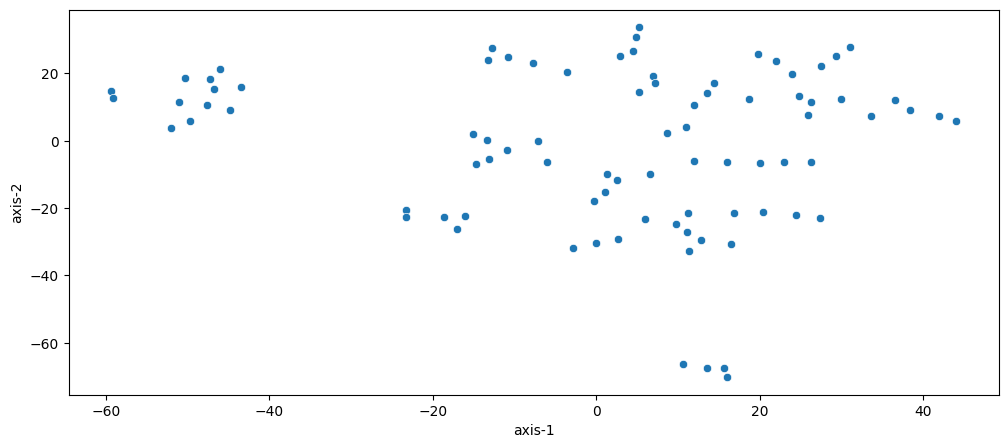

In [21]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2')

Как и ожидалось от t-SNE, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

0.49


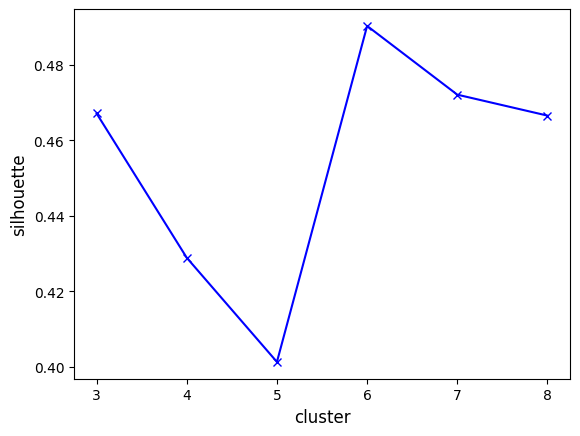

In [22]:
def get_silhouette(n_components, data):
    em_model = mixture.GaussianMixture(n_components=n_components, random_state=42)
    em_model.fit(data)
    labels = em_model.predict(data)
    silhouette = metrics.silhouette_score(data, labels)
    return silhouette

silhouette_list = []
for n_components in range(3, 9):
        silhouette_list.append(get_silhouette(n_components, rfm_table_processed))

plt.plot([i for i in range(3, 9)], silhouette_list, 'xb-')
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
print(np.round(np.max(silhouette_list),2))

0.5


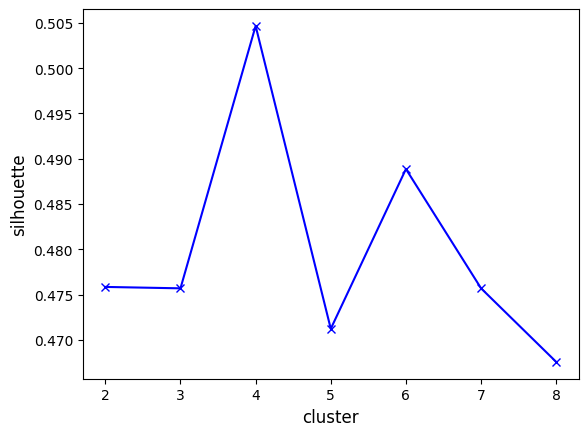

In [23]:
def get_silhouette(n_clusters, data):
    agg_clustering = cluster.AgglomerativeClustering(n_clusters=n_clusters)
    agg_clustering.fit(data)
    silhouette = metrics.silhouette_score(data, agg_clustering.labels_)
    return silhouette

silhouette_list = []
for n_clusters in range(2, 9):
        silhouette_list.append(get_silhouette(n_clusters, rfm_table_processed))

plt.plot([i for i in range(2, 9)], silhouette_list, 'xb-')
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
print(np.round(np.max(silhouette_list),2))

Лучшая модель AgglomerativeClustering, т.к. в нем коэффициент силуэта наибольший 0.5
Обучим модель с подобранным ранее количеством кластеров на декомпозированных данных.

In [24]:
agg_clustering = cluster.AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(rfm_table_processed)
labels = agg_clustering.labels_

Визуализируем результаты кластеризации:

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

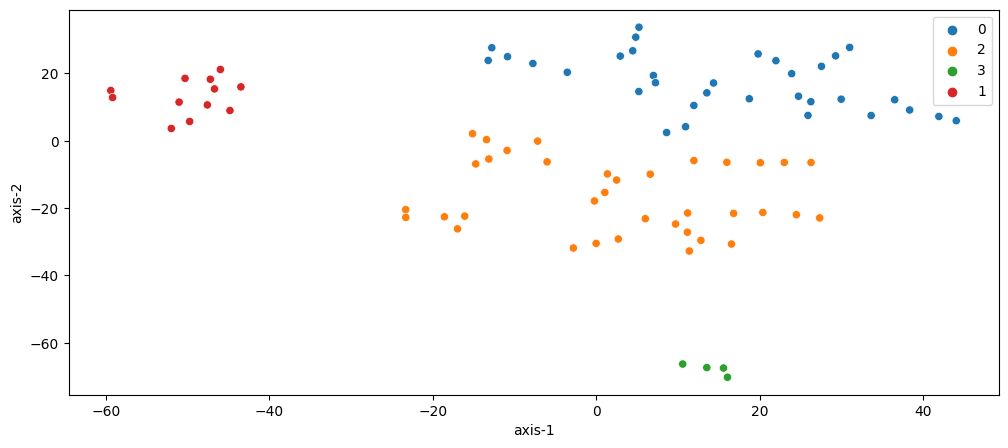

In [25]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2', hue=agg_clustering.labels_.astype('str'))

Мы видим, что первый кластер вдали от всех остальных

In [26]:
result_s['Cluster'] = labels
result_s['Cluster'].value_counts()

Cluster
2    36
0    33
1    12
3     4
Name: count, dtype: int64

In [27]:
cluster_0 = list(result_s[result_s['Cluster']==0].index)
print (', '.join(cluster_0))
result_s.loc[result_s['Cluster'] == 0].describe()

Белгородская область, Калужская область, Костромская область, Курская область, Липецкая область, Московская область, Тверская область, Ярославская область, г. Москва, Ненецкий автономный округ, Калининградская область, Ленинградская область, Мурманская область, г. Санкт-Петербург, Республика Крым, г. Севастополь, Республика Башкортостан, Республика Татарстан (Татарстан), Удмуртская Республика, Пермский край, Самарская область, Свердловская область, Тюменская область, Ханты-Мансийский автономный округ — Югра, Ямало-Ненецкий автономный округ, Челябинская область, Республика Хакасия, Красноярский край, Новосибирская область, Омская область, Камчатский край, Приморский край, Еврейская автономная область


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,Cluster
count,3.300000e+01,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.0
mean,2.335137e+06,35853.478788,0.000057,0.820832,9.484851e+05,12.418788,19.020000,206448.090909,37.651515,5.646970,49.875000,366.322776,51.264978,0.009072,0.011902,13.055556,64.302525,2759.266667,1299.821212,81048.078788,16.260606,0.0
std,2.278516e+06,15085.406736,0.000016,0.288651,1.316561e+06,4.809023,4.185618,50462.253729,8.196295,2.086805,8.491965,186.181541,28.267399,0.011778,0.001654,12.422713,24.951148,665.387722,520.150700,17775.827403,1.572605,0.0
min,4.258371e+04,20896.200000,0.000030,0.309457,2.271272e+05,5.860000,9.860000,132196.200000,12.625000,1.050000,21.775000,31.859744,17.286679,0.000000,0.008322,0.766667,17.800000,1357.300000,598.900000,52086.600000,13.700000,0.0
25%,9.646796e+05,27535.400000,0.000048,0.717203,4.270128e+05,9.480000,15.520000,169617.800000,36.325000,4.700000,50.475000,225.283245,28.565381,0.000000,0.010673,7.566667,49.333333,2384.200000,937.200000,70367.200000,15.500000,0.0
50%,1.536470e+06,30096.000000,0.000055,0.800498,4.918122e+05,12.100000,20.100000,202117.000000,39.650000,5.550000,52.825000,392.993123,39.886694,0.000000,0.011454,9.466667,63.500000,2774.300000,1140.100000,78434.800000,16.000000,0.0
75%,3.218552e+06,41757.600000,0.000064,0.915311,7.687333e+05,14.320000,22.060000,225853.800000,42.225000,7.025000,55.100000,473.014878,66.411916,0.018744,0.012778,12.900000,74.800000,3100.200000,1460.000000,88428.400000,17.100000,0.0
max,1.147229e+07,80159.800000,0.000124,1.628376,6.408588e+06,27.080000,27.160000,380821.800000,47.700000,9.775000,58.425000,809.991120,132.684523,0.033079,0.015625,68.400000,133.466667,3995.800000,3077.200000,138231.700000,20.900000,0.0


In [28]:
cluster_1 = list(result_s[result_s['Cluster']==1].index)
print (', '.join(cluster_1))
result_s.loc[result_s['Cluster'] == 1].describe()

Республика Адыгея (Адыгея), Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Ставропольский край, Республика Алтай, Республика Тыва (Тува), Республика Бурятия, Забайкальский край


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,Cluster
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,1.034236e+06,22022.416667,0.000103,1.084751,227025.916667,21.136667,23.780000,138612.916667,40.141667,7.264583,52.593750,41.164862,15.538554,0.057273,0.016393,7.038889,54.252778,3104.583333,1164.333333,64729.733333,18.666667,1.0
std,8.880492e+05,3790.828916,0.000042,0.257801,53476.163421,6.807754,3.424585,50566.166131,4.191582,2.438364,2.875625,38.298599,9.212029,0.037352,0.004485,2.477243,19.171180,973.570591,378.105118,11900.026632,3.731764,0.0
min,2.090464e+05,16234.600000,0.000048,0.787346,134501.460000,12.860000,17.420000,49174.200000,34.700000,3.900000,47.325000,1.635815,2.414834,0.000000,0.011540,3.466667,27.350000,1872.300000,709.400000,44792.000000,13.600000,1.0
25%,4.469071e+05,19262.500000,0.000075,0.887982,189395.410000,14.275000,21.895000,107329.750000,36.806250,4.831250,50.612500,12.628085,9.575397,0.042259,0.013298,5.425000,41.783333,2521.675000,922.375000,60203.850000,16.925000,1.0
50%,7.864819e+05,23181.600000,0.000083,1.006318,228358.580000,20.750000,23.500000,150869.200000,39.850000,7.250000,52.562500,27.623725,13.128367,0.055822,0.015098,7.066667,52.041667,2936.700000,1077.700000,62401.600000,18.600000,1.0
75%,1.151387e+06,24388.500000,0.000137,1.272356,263356.515000,24.620000,27.105000,179232.050000,43.968750,9.287500,55.106250,66.669224,21.962802,0.061548,0.018881,8.500000,66.404167,3499.975000,1328.925000,67747.475000,19.300000,1.0
max,2.832146e+06,27704.000000,0.000177,1.480570,321327.440000,34.760000,28.480000,205971.200000,46.025000,10.975000,56.400000,110.825190,31.746910,0.157784,0.024560,11.166667,87.166667,5470.300000,2116.900000,89433.500000,27.800000,1.0


In [29]:
cluster_2 = list(result_s[result_s['Cluster']==2].index)
print (', '.join(cluster_2))
result_s.loc[result_s['Cluster'] == 2].describe()

Брянская область, Ивановская область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тульская область, Республика Карелия, Республика Коми, Архангельская область, Новгородская область, Псковская область, Республика Калмыкия, Краснодарский край, Астраханская область, Ростовская область, Республика Марий Эл, Республика Мордовия, Чувашская Республика — Чувашия, Кировская область, Нижегородская область, Оренбургская область, Пензенская область, Саратовская область, Ульяновская область, Курганская область, Алтайский край, Иркутская область, Кемеровская область — Кузбасс, Томская область, Республика Саха (Якутия), Хабаровский край, Амурская область, Магаданская область, Сахалинская область, Чукотский автономный округ


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,Cluster
count,3.600000e+01,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,1.431203e+06,29582.922222,0.000056,0.886635,5.285716e+05,15.132778,22.228889,179699.377778,36.199306,5.813889,53.131250,222.475092,38.705073,0.004690,0.011269,9.356481,87.568981,3445.530556,1614.736111,84504.658333,17.408333,2.0
std,1.113652e+06,12387.673841,0.000021,0.229011,4.129888e+05,3.997357,4.294386,44885.839787,5.117029,1.822277,7.183004,156.865914,33.744853,0.010714,0.001562,6.373815,42.043699,1087.128397,535.024428,16130.553156,2.009318,0.0
min,5.257712e+04,17471.600000,0.000029,0.365111,2.325530e+05,8.480000,6.480000,77126.400000,24.475000,0.675000,24.850000,3.150680,10.757182,0.000000,0.008805,0.666667,40.650000,1453.400000,641.500000,64679.900000,13.800000,2.0
25%,8.306668e+05,23246.900000,0.000047,0.798321,3.089396e+05,13.370000,21.790000,148634.850000,34.693750,4.943750,52.700000,160.119385,20.267578,0.000000,0.010028,4.450000,57.829167,2630.150000,1319.175000,71586.025000,16.450000,2.0
50%,1.089442e+06,25631.500000,0.000052,0.935871,3.873538e+05,14.880000,22.860000,176476.500000,37.537500,5.625000,54.950000,185.036997,32.904449,0.000000,0.011167,7.733333,82.250000,3197.050000,1603.650000,82247.650000,17.250000,2.0
75%,1.436574e+06,31502.000000,0.000059,1.029784,5.065807e+05,17.305000,24.665000,209328.250000,39.625000,7.037500,56.850000,227.134910,40.438344,0.000000,0.012323,11.775000,99.125000,4086.150000,1780.675000,93838.475000,18.350000,2.0
max,5.325705e+06,78492.600000,0.000160,1.359854,2.029395e+06,27.140000,27.820000,307109.800000,45.200000,10.200000,61.425000,812.994315,198.939139,0.031646,0.015663,25.066667,264.600000,6010.800000,3885.000000,128506.500000,24.100000,2.0


In [30]:
cluster_3 = list(result_s[result_s['Cluster']==3].index)
print (', '.join(cluster_3))
result_s.loc[result_s['Cluster'] == 3].describe()

Владимирская область, Воронежская область, Вологодская область, Волгоградская область


,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv,Cluster
count,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0
mean,1.905923e+06,26328.000000,0.000051,0.981011,406356.670000,12.190000,23.305000,177505.250000,36.150000,5.656250,51.931250,362.794841,34.058091,0.006169,0.010499,11.566667,67.954167,3207.350000,1445.725000,76248.100000,0.0,3.0
std,6.759883e+05,3430.152117,0.000010,0.129661,66142.209596,2.168041,2.477976,37989.186118,4.596647,0.386962,8.183097,154.205754,9.227222,0.012339,0.000982,7.213721,11.248912,1119.139483,138.713022,19603.306773,0.0,0.0
min,1.216547e+06,23058.200000,0.000041,0.807059,357923.420000,8.940000,19.940000,154123.800000,29.625000,5.400000,39.950000,207.067929,26.355518,0.000000,0.009670,5.433333,55.000000,2486.200000,1265.200000,55009.900000,0.0,3.0
25%,1.391566e+06,23875.250000,0.000045,0.925777,360861.155000,12.135000,22.205000,157648.050000,34.575000,5.418750,50.712500,297.049311,27.797396,0.000000,0.009942,7.683333,62.812500,2657.800000,1381.525000,61910.350000,0.0,3.0
50%,1.901286e+06,25809.800000,0.000049,1.004954,383679.280000,13.220000,23.950000,160829.500000,37.775000,5.500000,54.687500,334.182802,31.542986,0.000000,0.010211,9.450000,67.291667,2733.200000,1464.250000,77909.450000,0.0,3.0
75%,2.415643e+06,28262.550000,0.000056,1.060188,429174.795000,13.275000,25.050000,180686.700000,39.350000,5.737500,55.906250,399.928333,37.803681,0.006169,0.010767,13.333333,72.433333,3282.750000,1528.450000,92247.200000,0.0,3.0
max,2.604571e+06,30634.200000,0.000065,1.107079,500144.700000,13.380000,25.380000,234238.200000,39.425000,6.225000,58.400000,575.745831,46.790874,0.024677,0.011904,21.933333,82.233333,4876.800000,1589.200000,94163.600000,0.0,3.0


Следует обратить внимание на кластер 1 по сравнению с другими кластерами в данном кластере наблюдается в среднем самый большой показатель людей ,живущих за чертой бедности, высокая безработица, низкие среднедушевые денежные доходы, низкий объем производимого обрабатывающего производства на душу населения и объем производимой электрической энергии, газом и паром на душу населения. Ключевой особенностью являются минимальные показатели наркомании, алкоголизма и заболеваемости в целом. Также отметим, что данный кластер получает самую большую долю расходов на социальную политику. 
<b>*Регионы именно этого кластера нуждаются в помощи в первую очередь.*</b>

Мы построили модель кластеризации. Чтобы сделать предсказание давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров.

In [31]:
X = result_s.drop(['Cluster'], axis=1)
y = result_s[['Cluster']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 42, test_size = 0.2)

In [32]:
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

grid_RFC = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_RFC.fit(X_train, y_train).predict(X_test)
print("Best parameters:",grid_RFC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 500}
Accuracy: 0.765


In [33]:
param_grid = {
    'max_depth': range(3, 7),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_GBC= model_selection.GridSearchCV(
    estimator=ensemble.GradientBoostingClassifier(
        random_state=42), 
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

y_pred_test = grid_GBC.fit(X_train, y_train).predict(X_test)
print("Best parameters:", grid_GBC.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test).round(3))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.824


In [34]:
# Сохранение выбранной обученной модели в файл pickle
with open("social_russia_data\Test\grid_GBC.pkl", "wb") as f:
    pickle.dump(grid_GBC, f)

In [35]:
# Загрузка сохраненной модели из файла pickle
with open("social_russia_data\Test\grid_GBC.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [41]:
# создадим тестовый набор 
data = [
    ('168811', '28222.4' ,'0.000044', '1.73', '678764', '5.68', '11.74', '216128.2', 
     '19.050', '8.175', '17.775', '483.14', '16.28', '0.0003', '0.010295', '2.19', '41.2', '3895.8', 
     '799.6', '71637.4', '16.4'),
    ('1.288930e+06', '26533.0','0.000053', '1.001405', '304715.44', '13.92', '23.76', '206798.0',
     '41.375', '3.875', '54.775', '190.684667', '14.387151', '0.000000', '0.010074', '10.000000',
     '94.100000', '3201.2', '1641.5', '77439.0', '24.1')
]

columns = ['population', 'cash_income', 'child_mort', 'disabled', 'grp',
       'poverty_%', 'Social_expenses_%', 'retail', 'poverty_deti_%',
       'poverty_pens_%', 'poverty_trud_%', 'rep_manufacture', 'rep_electro',
       'unemployed', 'borned', 'drug', 'alco', 'd_blood', 'd_endo', 'd_all',
       'square_liv']

df_test = pd.DataFrame(data, columns=columns)

df_test.head()

,population,cash_income,child_mort,disabled,grp,poverty_%,Social_expenses_%,retail,poverty_deti_%,poverty_pens_%,poverty_trud_%,rep_manufacture,rep_electro,unemployed,borned,drug,alco,d_blood,d_endo,d_all,square_liv
0,168811,28222.4,0.000044,1.73,678764,5.68,11.74,216128.2,19.050,8.175,17.775,483.14,16.28,0.0003,0.010295,2.19,41.2,3895.8,799.6,71637.4,16.4
1,1.288930e+06,26533.0,0.000053,1.001405,304715.44,13.92,23.76,206798.0,41.375,3.875,54.775,190.684667,14.387151,0.000000,0.010074,10.000000,94.100000,3201.2,1641.5,77439.0,24.1


In [42]:
y_pred = loaded_model.predict(df_test)
print(y_pred)

[0 2]


# Вывод

Проведен анализ социально-демографических групп населения, показывающий, что наиболее уязвимой группой населения по финасовым показателям являются семьи с детьми из регионов кластера 1 (Республика Адыгея (Адыгея), Республика Дагестан, Республика Ингушетия, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия — Алания, Чеченская Республика, Ставропольский край, Республика Алтай, Республика Тыва (Тува), Республика Бурятия, Забайкальский край). При этом в кластере наиболее бедных регионов наблюдается аномально высокая рождаемость, необеспеченная доходами родителей. В остальных группах рождаемость слабо растет с ростом финансового благополучия. Так же была обучена модель машинного обучения для данных которые не попали в выборку. 